<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/plot_mnist_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.


Automatically created module for IPython interactive environment
Iteration 1, loss = 0.46005595
Validation score: 0.942333
Iteration 2, loss = 0.20433072
Validation score: 0.956333
Iteration 3, loss = 0.16225482
Validation score: 0.962333
Iteration 4, loss = 0.13683302
Validation score: 0.969167
Iteration 5, loss = 0.12148142
Validation score: 0.970000
Iteration 6, loss = 0.11070081
Validation score: 0.971167
Iteration 7, loss = 0.10115208
Validation score: 0.974000
Iteration 8, loss = 0.09549162
Validation score: 0.975500
Iteration 9, loss = 0.09018725
Validation score: 0.975000
Iteration 10, loss = 0.08616978
Validation score: 0.975500
Iteration 11, loss = 0.08310388
Validation score: 0.973000
Iteration 12, loss = 0.07886210
Validation score: 0.977667
Iteration 13, loss = 0.07679324
Validation score: 0.975333
Iteration 14, loss = 0.07301299
Validation score: 0.975833
Iteration 15, loss = 0.07209919
Validation score: 0.976500
Iteration 16, loss = 0.06935953
Validation score: 0.978833


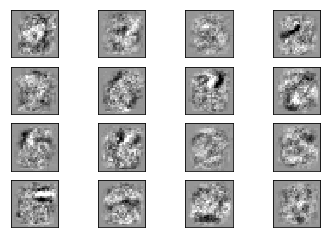

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
                hidden_layer_sizes=[100, 100],early_stopping=True,
                verbose=10, tol=0.00001)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()